<a href="https://colab.research.google.com/github/Prazzity/SII/blob/main/Lab5_SII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подгрузка файлов

In [17]:
# из библиотеки google.colab импортируем класс files
from google.colab import files
# создаем объект этого класса, применяем метод .upload()
uploaded = files.upload()

Saving winequality-red_test.csv to winequality-red_test.csv
Saving winequality-red_train.csv to winequality-red_train.csv


In [98]:
# импортируем модуль os
import os
# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):
# во вложенном цикле проходимся по названиям файлов
  for filename in filenames:
# и соединяем путь до папок и входящие в эти папки файлы
# с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/winequality-red_test.csv
/content/winequality-red_train.csv
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/default_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/logs/2023.11.20/14.38.59.765323.log
/content/.config/logs/2023.11.20/14.36.05.894714.log
/content/.config/logs/2023.11.20/14.42.08.245434.log
/content/.config/logs/2023.11.20/14.39.09.166199.log
/content/.config/logs/2023.11.20/14.42.07.513397.log
/content/.config/logs/2023.11.20/14.41.57.822879.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv


# Чтение из переменной uploaded

In [18]:
# обратимся к ключу словаря uploaded и применим метод .decode()
uploaded_str = uploaded['winequality-red_test.csv'].decode()
# на выходе получаем обычную строку
print(type(uploaded_str))

<class 'str'>


Выведем первые 146 значений

In [19]:
print(uploaded_str[:146])

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# Чтение через библиотеку Pandas

In [88]:
# импортируем библиотеку
import pandas as pd

# применим функцию read_csv() и посмотрим на первые три записи файла train.csv
train = pd.read_csv('/content/winequality-red_train.csv')
train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [90]:
# сделаем то же самое с файлом test.csv
test = pd.read_csv('/content/winequality-red_test.csv')
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7
1,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
2,6.6,0.44,0.15,2.1,0.076,22.0,53.0,0.99570,3.32,0.62,9.3,5


## Построение модели и прогноз

#### **Шаг 1**. Обработка и анализ данных

In [29]:
# посмотрим на данные в целом
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1209 non-null   float64
 1   volatile acidity      1209 non-null   float64
 2   citric acid           1209 non-null   float64
 3   residual sugar        1209 non-null   float64
 4   chlorides             1209 non-null   float64
 5   free sulfur dioxide   1209 non-null   float64
 6   total sulfur dioxide  1209 non-null   float64
 7   density               1209 non-null   float64
 8   pH                    1209 non-null   float64
 9   sulphates             1209 non-null   float64
 10  alcohol               1209 non-null   float64
 11  quality               1209 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 113.5 KB


<Axes: xlabel='quality', ylabel='count'>

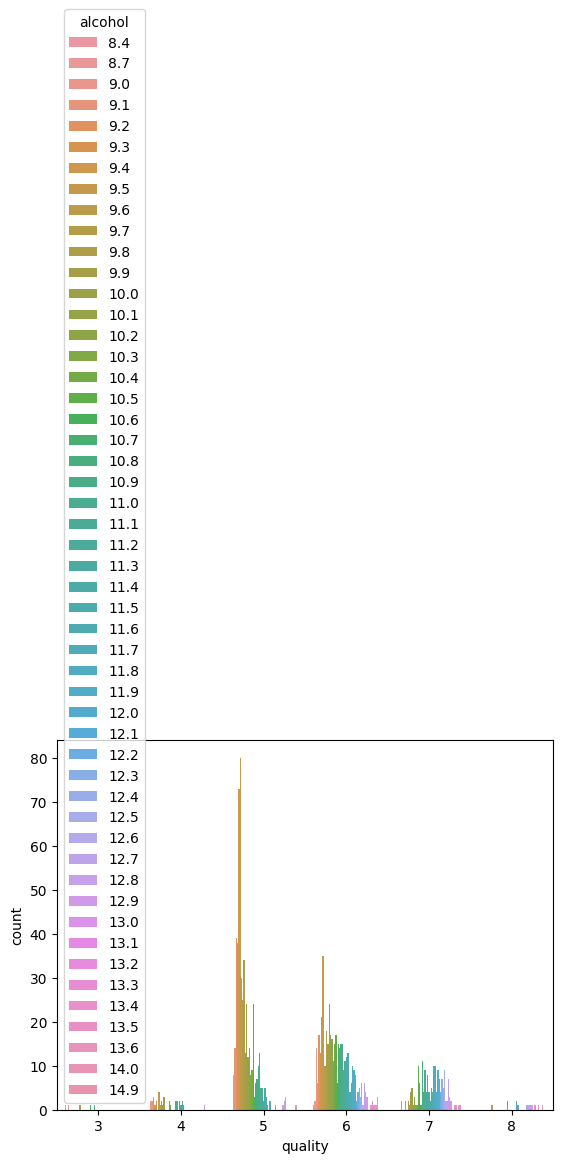

In [24]:
# для построения графиков воспользуемся новой для нас библиотекой seaborn
import seaborn as sns
# посмотрим как соотносится процентное содержание алкоголя и качество вина
# с помощью x и hue мы можем отобразить это на графике
sns.countplot(x = 'quality', hue = 'alcohol', data = train)

In [27]:
# выявим пропущенные значения с помощью .isnull() и посчитаем их количество через sum()
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Нормализация данных

In [30]:
# импортируем класс StandardScaler
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(train[cols_to_scale])

# применим их
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# посмотрим на результат
train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.687025,1.012519,-1.497930,-0.524482,-0.274370,-0.418772,-0.379295,0.400397,1.357241,-0.604414,-0.903862,5
1,-0.461896,2.018427,-1.497930,0.029593,0.182679,0.952771,0.594685,-0.132437,-0.633602,0.078411,-0.536637,5
2,-0.461896,1.347822,-1.294161,-0.207868,0.058029,-0.026903,0.210996,-0.025870,-0.248278,-0.092295,-0.536637,5


In [31]:
# некоторые названия столбцов теперь представляют собой числа, так быть не должно
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [32]:
# преобразуем эти переменные в тип str через функцию map()
train.columns = train.columns.map(str)

#### **Шаг 2**. Разделение обучающей выборки на признаки (X_train) и целевую переменную (y_train)

In [33]:
# поместим в X_train все кроме столбца quality
X_train = train.drop('quality', axis = 1)

# столбец 'quality' станет нашей целевой переменной (y_train)
y_train = train['quality']

In [34]:
X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.687025,1.012519,-1.497930,-0.524482,-0.274370,-0.418772,-0.379295,0.400397,1.357241,-0.604414,-0.903862
1,-0.461896,2.018427,-1.497930,0.029593,0.182679,0.952771,0.594685,-0.132437,-0.633602,0.078411,-0.536637
2,-0.461896,1.347822,-1.294161,-0.207868,0.058029,-0.026903,0.210996,-0.025870,-0.248278,-0.092295,-0.536637


#### **Шаг 3**. Обучение модели логистической регрессии

Обучим модель

In [48]:
# импортируем логистическую регрессию из модуля ensemble библиотеки sklearn
from sklearn.ensemble import RandomForestClassifier

# создадим объект этого класса и запишем его в переменную model
model = RandomForestClassifier()

# обучим нашу модель
model.fit(X_train, y_train)

RandomForestClassifier()

Сделаем прогноз на обучающей выборке

In [49]:
# сделаем предсказание класса на обучающей выборке
y_pred_train = model.predict(X_train)

Оценка качества модели на обучающей выборке

In [51]:
# построим матрицу ошибок
from sklearn.metrics import confusion_matrix

# передадим ей фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_train)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1,2,3,4,5
0,5,0,0,0,0,0
1,0,35,0,0,0,0
2,0,0,515,0,0,0
3,0,0,0,465,0,0
4,0,0,0,0,175,0
5,0,0,0,0,0,14


In [50]:
# импортируем метрику accuracy из sklearn
from sklearn.metrics import accuracy_score

# так же передадим ей фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_train)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

1.0

#### Построение прогноза на тестовой выборке

In [52]:
# посмотрим на тестовые данные
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         390 non-null    float64
 1   volatile acidity      390 non-null    float64
 2   citric acid           390 non-null    float64
 3   residual sugar        390 non-null    float64
 4   chlorides             390 non-null    float64
 5   free sulfur dioxide   390 non-null    float64
 6   total sulfur dioxide  390 non-null    float64
 7   density               390 non-null    float64
 8   pH                    390 non-null    float64
 9   sulphates             390 non-null    float64
 10  alcohol               390 non-null    float64
 11  quality               390 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 36.7 KB


In [91]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7
1,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6
2,6.6,0.44,0.15,2.1,0.076,22.0,53.0,0.99570,3.32,0.62,9.3,5


In [92]:
# теперь нам нужно создать тестовую выборку с теми же признаками
# и для начала дадим датасету привычное название
X_test = test
# сохраним столбец для оценки качества модели
y_test = test['quality']

In [93]:
X_test.drop(['quality'], axis = 1, inplace = True)
# выберем те столбцы, которые мы хотим масштабировать
cols_to_scale = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# рассчитаем среднее арифметическое и СКО для масштабирования данных
scaler.fit(test[cols_to_scale])

# применим их
test[cols_to_scale] = scaler.transform(test[cols_to_scale])

# посмотрим на результат
X_test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.97428,-0.940079,1.347552,-0.260343,-0.257046,-0.339988,-0.720083,-0.964724,0.699925,1.628400,0.672648
1,-0.48156,0.534726,-1.048995,-0.204355,-0.094532,-0.886023,-1.024637,-0.523598,0.001969,-0.090251,-0.145384
2,-0.64580,-0.656462,-0.289114,-0.204355,-0.140964,0.388058,0.261257,-0.069869,-0.207418,-0.090251,-1.270179


In [84]:
# некоторые названия столбцов теперь представляют собой числа, так быть не должно
X_test.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [94]:
# превратим названия столбцов в строки
X_test.columns = X_test.columns.map(str)

In [95]:
# сделаем прогноз на тестовой выборке
y_pred_test = model.predict(X_test)

In [96]:
# посмотрим на первые 10 прогнозных значений
y_pred_test[:10]

array([7, 6, 6, 6, 6, 5, 6, 5, 7, 6])

In [97]:
# передадим функции фактические и прогнозные значения
model_accuracy = accuracy_score(y_test, y_pred_test)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.59

###  Сохранение результата в новом файле на сервере

Создание файла с прогнозом

In [ ]:
# возьмем индекс пассажиров из столбца PassengerId тестовой выборки
ids = test['PassengerId']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - это id пассажира, вторая - прогноз "на тесте"
result = pd.DataFrame({'PassengerId': ids, 'Survived': y_pred_test})

# посмотрим, что получилось
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
# создадим новый файл result.csv с помощью функции to_csv(), удалив при этом индекс
result.to_csv('result.csv', index = False)

# файл будет сохранен в 'Сессионном хранилище' и, если все пройдет успешно, выведем следующий текст:
print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!
